In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
#Carregar a base de dados
df = pd.read_csv('data.csv')
df.head()

,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,...,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_Co-op apartment,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,1,1,0,58.832877,3.106849,1,0,0,0,2,...,1,0,0,0,0,1,0,0,0,0
1,0,1,0,52.356164,8.358904,1,0,1,1,1,...,0,0,1,0,0,1,0,0,0,0
2,0,1,0,52.356164,8.358904,1,0,1,1,1,...,0,0,1,0,0,1,0,0,0,0
3,1,1,0,46.224658,2.106849,1,1,1,1,2,...,1,0,0,0,0,1,0,0,0,0
4,1,0,0,29.230137,3.021918,1,0,0,0,2,...,1,0,0,0,0,1,0,0,0,0


In [4]:
#Separar as variáveis independentes da variável alvo (mau)
X = df.drop(columns='mau')
y = df['mau']

In [5]:
#Dividir os dados em treino e teste 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23)

In [10]:
#Criar o modelo random forest
rf_model = RandomForestClassifier(
    n_estimators= 100,
    max_features='sqrt',
    random_state= 23
)
#Treinar o modelo
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=23)

In [11]:
#Criar previsões
y_pred = rf_model.predict(X_test)

In [17]:
#Avaliação
accuracy = accuracy_score(y_test, y_pred)
matriz_conf = confusion_matrix(y_test, y_pred)

print(f'Acurácia: {accuracy:.2f}\n')
print(f'Matriz confusão: {matriz_conf}\n')

Acurácia: 0.97

Matriz confusão: [[  20  100]
 [  33 4842]]



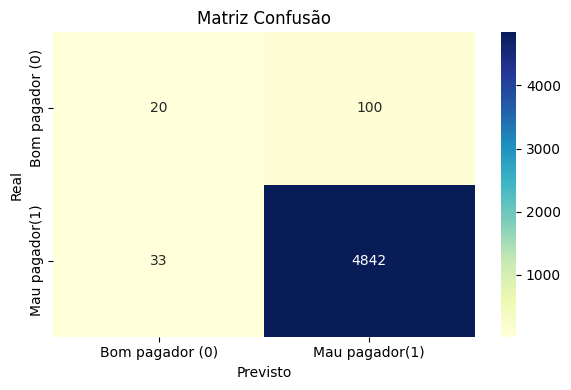

In [22]:
#Visualização da Matriz de confusão
plt.figure(figsize=(6,4))
sns.heatmap(matriz_conf, 
            annot=True,
            fmt='d',
            cmap='YlGnBu',
            xticklabels=['Bom pagador (0)', 'Mau pagador(1)'],
            yticklabels=['Bom pagador (0)', 'Mau pagador(1)']
            )
plt.title('Matriz Confusão')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.tight_layout()
plt.show()